In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size':22})

import warnings
warnings.filterwarnings('ignore')

t0: [3.35 3.47]
t0: [3.23 3.45]
t0: [3.05 3.43]
t0: [3.11 3.69]
t4: [2.85 3.37]
t4: [3.03 3.37]
t4: [3.05 3.29]
t4: [3.13 3.65]
t2: [2.61 2.79]
t2: [2.57 2.91]
t2: [2.51 2.99]
t2: [2.57 2.97]


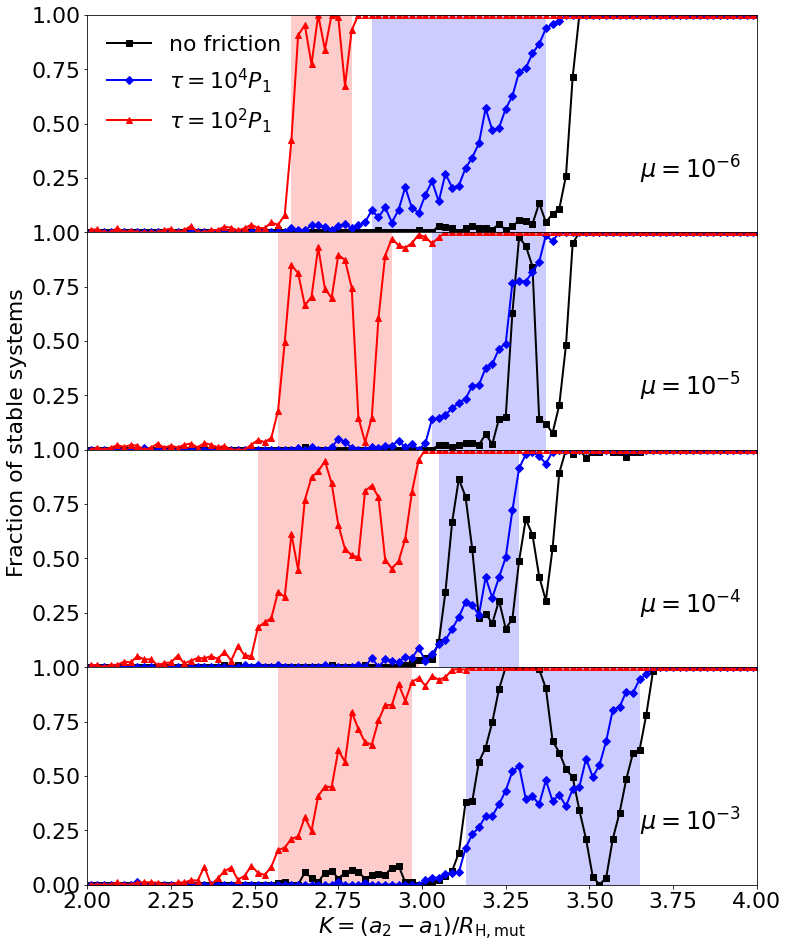

In [47]:
def resonance_to_K(res_val,mu):
    P1 = 1**(-1.5)
    P2 = P1*res_val
    a1 = P1**(2./3.)
    a2 = P2**(2./3.)
    RH = 0.5*(a1+a2) * ((1*mu)/3.)**(1./3.)
    return (a2-a1)/RH

from scipy.optimize import curve_fit

def frac_fit(K,Kcr,Kwid):
    return 1./(1.+np.exp(-(K-Kcr)/Kwid))

def frac_fit2(K,Kcr):
    return 1./(1.+np.exp(-(K-Kcr)/0.1))


K_crit = 3.33697392249

cuse = plt.rcParams['axes.prop_cycle'].by_key()['color']
cuse = ['k','k','k','k','k']

dir_name_list = [6,5,4,3]
mu_l = np.array([1e-6,1e-5,1e-4,1e-3])


fig,axs = plt.subplots(4,1, sharex=True, sharey=False, figsize=(12,16))
fig.subplots_adjust(hspace=0.0)

Kcr0 = np.zeros(4)
Kgz0 = np.zeros(4)

for iii in [0,1,2,3]:
    
    mu = mu_l[iii]
    data = np.load('../data/1p/no-gas-m1e-%1d.npy'%(dir_name_list[iii]))
    edges = np.linspace(2,4,101)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    #print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    axs[iii].plot(bins,safe_hist/tot_hist,'s-',c='k',lw=2,label='no friction')
    #axs[iii].scatter(bins,safe_hist/tot_hist,c='k',s=10,marker='s')
    
    dpc = 0.1
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))
    print('t0:',bins[[igzmin,igzmax]])
    
    Kcr0[iii] = bins[igzmax]
    Kgz0[iii] = bins[igzmin]
    
    #axs[iii].fill_between(bins[[igzmin,igzmax]],[0,0],[1,1],edgecolor='none',facecolor='k',alpha=0.2)
    axs[iii].text(3.65,0.25,r'$\mu=10^{-%d}$'%int(dir_name_list[iii]),fontsize=24)
    
    axs[iii].set_yticks([0.25,0.5,0.75,1.0])
    axs[iii].set_ylim([0.0,1.0])

Kcr4 = np.zeros(4)
Kgz4 = np.zeros(4)

for iii in [0,1,2,3]:
    mu = mu_l[iii]
    data = np.load('../data/res/1p/t4-m1e-%1d.npy'%(dir_name_list[iii]))
    edges = np.linspace(2,4,101)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    #print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    axs[iii].plot(bins,safe_hist/tot_hist,'D-',c='b',lw=2,label=r'$\tau = 10^4P_1$')
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))
    print('t4:',bins[[igzmin,igzmax]])
    
    Kcr4[iii] = bins[igzmax]
    Kgz4[iii] = bins[igzmin]
    
    axs[iii].fill_between(bins[[igzmin,igzmax]],[0,0],[1,1],edgecolor='none',facecolor='b',alpha=0.2)
    
    
Kcr2 = np.zeros(4)
Kgz2 = np.zeros(4)

for iii in [0,1,2,3]:
    mu = mu_l[iii]
    data = np.load('../data/res/1p/t2-m1e-%1d.npy'%(dir_name_list[iii]))
    edges = np.linspace(2,4,101)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    #print('[%1d] minimum sample size per bin:'%iii,np.min(tot_hist))
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    axs[iii].plot(bins,safe_hist/tot_hist,'^-',c='r',lw=2,label=r'$\tau = 10^2P_1$')
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc))
    print('t2:',bins[[igzmin,igzmax]])
    
    Kcr2[iii] = bins[igzmax]
    Kgz2[iii] = bins[igzmin]
    
    axs[iii].fill_between(bins[[igzmin,igzmax]],[0,0],[1,1],edgecolor='none',facecolor='r',alpha=0.2)

    
axs[-1].set_yticks([0.0,0.25,0.5,0.75,1.0])
axs[0].legend(frameon=False)
    
axs[-1].set_xlabel(r'$K= (a_2-a_1)/R_{\rm H,mut}}$')
axs[2].set_ylabel('                                    Fraction of stable systems')

axs[-1].set_xlim([2.0,4.0])
axs[-1].set_ylim([0.0,1.0])
#axs[3].set_xticks(np.linspace(2.0,4.0,11))

plt.savefig('./pics/pics-fraction_wf-wRH-rev2.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-fraction_wf-wRH-rev2.png',bbox_inches='tight',transparent=True)

[ 1.79543603 -2.51148345] [0.1242629  0.37683837]
[ 2.32308606 -4.65100335] [0.15367156 0.45862438]
[ 3.19416118 -7.10235452] [0.14152381 0.41340215]
[ 2.11975969 -4.34981527] [0.05138825 0.15140302]
t4: 3.37
t4: 3.37
t4: 3.29
t4: 3.6500000000000004
t2: 2.79
t2: 2.91
t2: 2.99
t2: 2.9699999999999998


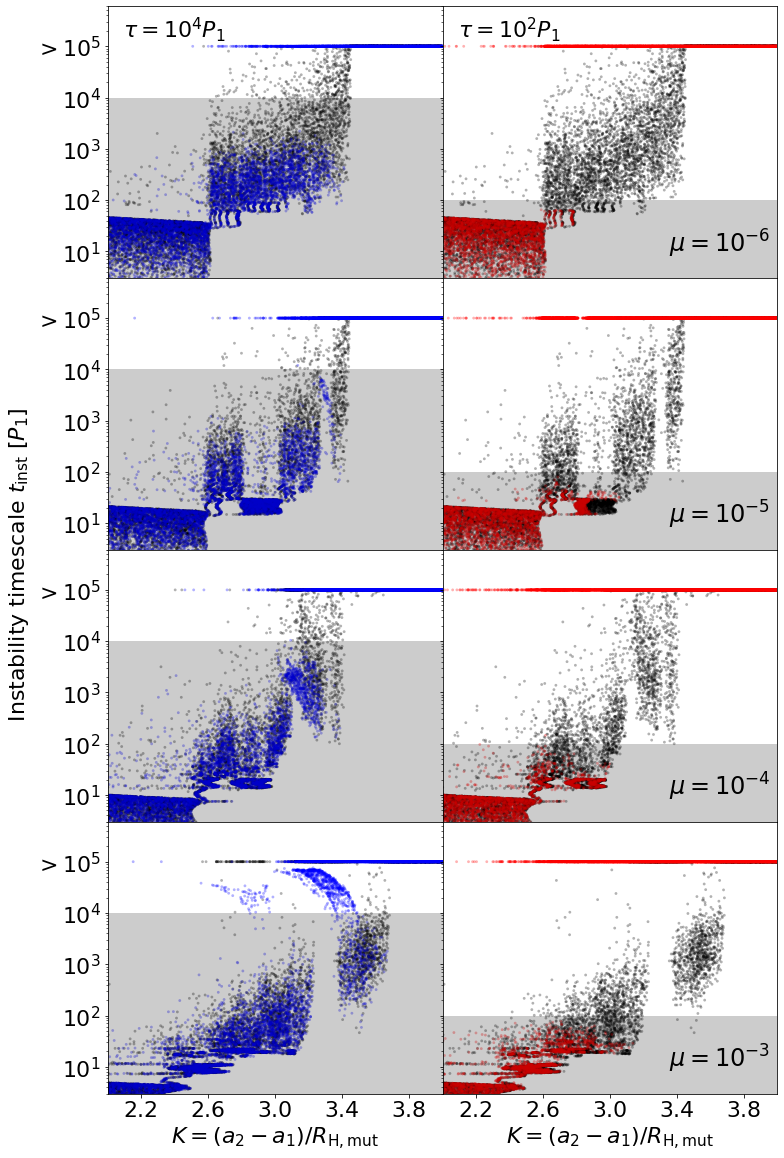

In [49]:
def resonance_to_K(res_val,mu):
    P1 = 1**(-1.5)
    P2 = P1*res_val
    a1 = P1**(2./3.)
    a2 = P2**(2./3.)
    RH = 0.5*(a1+a2) * ((1*mu)/3.)**(1./3.)
    return (a2-a1)/RH

from scipy.optimize import curve_fit

def frac_fit(K,Kcr,Kwid):
    return 1./(1.+np.exp(-(K-Kcr)/Kwid))

def frac_fit2(K,Kcr):
    return 1./(1.+np.exp(-(K-Kcr)/0.1))


def K_to_Tsyn(K,mu):
    a1 = 1.
    eta = ((mu)/3.)**(1./3.)
    RH = (eta/(1.-0.5*K*eta)) * a1
    a2 = a1+ K*RH
    T1 = a1**1.5
    T2 = a2**1.5
    Tsyn = 1/(1./T1-1./T2)
    return Tsyn

K_crit = 3.33697392249

cuse = plt.rcParams['axes.prop_cycle'].by_key()['color']
cuse = ['k','k','k','k','k']

K_gz_list = [3.29,3.19,3.01,2.65]
K_crit_list = [3.47,3.47,3.43,3.69]

dir_name_list = [6,5,4,3]
mu_l = [1e-6,1e-5,1e-4,1e-3]

fig,axs = plt.subplots(4,2, sharex=True, sharey=True,figsize=(12,20))
fig.subplots_adjust(hspace=0.0,wspace=0.0)



for iii in [0,1,2,3]:
    
    mu = mu_l[iii]
    data = np.load('../data/1p/no-gas-m1e-%1d.npy'%(dir_name_list[iii]))
    K =  data[:,2]
    Tinst = data[:,3]
    axs[iii,0].scatter(K,Tinst,c='k',s=8,alpha=0.3,edgecolors='none',rasterized=True)
    axs[iii,0].set_yscale('log')
    axs[iii,0].set_ylim([3.0e0,6e5])
    axs[iii,0].set_yticks([1e1,1e2,1e3,1e4,1e5])
    axs[iii,0].set_yticklabels([r'$10^{1}$',r'$10^{2}$',r'$10^{3}$',r'$10^{4}$',r'$>10^{5}$'])  
    axs[iii,1].scatter(K,Tinst,c='k',s=8,alpha=0.3,edgecolors='none',rasterized=True)
    axs[iii,1].set_yscale('log')
    axs[iii,1].set_ylim([3.0e0,6e5])
    axs[iii,1].set_yticks([1e1,1e2,1e3,1e4,1e5])
    axs[iii,1].set_yticklabels([r'$10^{1}$',r'$10^{2}$',r'$10^{3}$',r'$10^{4}$',r'$>10^{5}$']) 
    axs[iii,1].text(3.35,1e1,r'$\mu=10^{-%d}$'%int(dir_name_list[iii]),fontsize=24)

    
    Tsyn = K_to_Tsyn(K,mu)
    Kl = np.linspace(2,4,100)
    Tsynl =  K_to_Tsyn(Kl,mu)
    for ik in range(len(Kl)-1):
        ind_k = (K>Kl[ik]) * (K<Kl[ik+1])
        K_sub = K[ind_k]
        Tinst_sub = Tinst[ind_k]
        if np.sum(Tinst_sub>Tsynl[ik])>(0.5*np.sum(Tinst_sub>0)):
            Ksyn = 0.5*(Kl[ik]+Kl[ik+1])
            break
            
    Kl = np.linspace(2,Ksyn,100)
    Tsynl =  K_to_Tsyn(Kl,mu)        
    
    K_crit = K_crit_list[iii]
    K_gz = K_gz_list[iii]
    
    K_crit = Kcr0[iii]
    K_gz = Kgz0[iii]
    
    def Tins_fit(K,b,c):
        return b*K+c
    
    ind_fit = (K>Ksyn) * (K<K_crit) * (data[:,0]<0.5)
    X_fit = K[ind_fit]
    Y_fit = np.log10(Tinst[ind_fit])
    popt, pcov = curve_fit(Tins_fit, X_fit, Y_fit)
    print(popt,np.sqrt(np.diag(pcov))*3)
    kk_fit = np.linspace(Ksyn,K_crit,11)
    
    #K_crit_fit = np.interp(4, Tins_fit(kk_fit, *popt),kk_fit)
    #axs[iii,0].fill_between([2,K_crit_fit],[1e-2,1e-2],[1e4,1e4],edgecolor='none',facecolor='k',alpha=0.2)
    #K_crit_fit = np.interp(2, Tins_fit(kk_fit, *popt),kk_fit)
    #axs[iii,1].fill_between([2,K_crit_fit],[1e-2,1e-2],[1e2,1e2],edgecolor='none',facecolor='k',alpha=0.2)
    
for iii in [0,1,2,3]:
    mu = mu_l[iii]
    data = np.load('../data/1p/t4-m1e-%1d.npy'%(dir_name_list[iii]))
    K =  data[:,2]
    Tinst = data[:,3]
    axs[iii,0].scatter(K,Tinst,c='b',s=8,alpha=0.3,edgecolors='none',rasterized=True)
    edges = np.linspace(2,4,101)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    dpc = 0.1
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc)) 
    K_crit = bins[igzmax]
    print('t4:',K_crit)
    axs[iii,0].fill_between([2,4],[1e-2,1e-2],[1e4,1e4],edgecolor='none',facecolor='k',alpha=0.2)
            
for iii in [0,1,2,3]:  
    mu = mu_l[iii]
    data = np.load('../data/1p/t2-m1e-%1d.npy'%(dir_name_list[iii]))
    K =  data[:,2]
    Tinst = data[:,3]
    axs[iii,1].scatter(K,Tinst,c='r',s=8,alpha=0.3,edgecolors='none',rasterized=True)
    edges = np.linspace(2,4,101)
    bins = 0.5*(edges[:-1]+edges[1:])
    tot_hist, edges = np.histogram(data[:,2],bins=edges)
    safe_hist, edges = np.histogram(data[:,2][data[:,0]>0.5],bins=edges)
    dpc = 0.10
    igzmin = np.argmax(safe_hist/tot_hist>dpc)
    igzmax = len(bins) - np.argmax((safe_hist/tot_hist)[::-1]<(1-dpc)) 
    K_crit = bins[igzmax]
    print('t2:',K_crit)
    axs[iii,1].fill_between([2,4],[1e-2,1e-2],[1e2,1e2],edgecolor='none',facecolor='k',alpha=0.2)
    
#axs[-1].set_yticks([0.0,0.25,0.5,0.75,1.0])
#axs[0].legend()

axs[0,0].text(2.4,1.5e5,r'$\tau=10^{4}P_1$',ha='center')
axs[0,1].text(2.4,1.5e5,r'$\tau=10^{2}P_1$',ha='center')

axs[-1,0].set_xlabel(r'$K= (a_2-a_1)/R_{\rm H,mut}}$')
axs[-1,1].set_xlabel(r'$K= (a_2-a_1)/R_{\rm H,mut}}$')
axs[2,0].set_ylabel(r'                                   Instability timescale $t_{\rm inst}$ [$P_1$]')

axs[-1,0].set_xlim([2.0,4.0])
axs[-1,1].set_xlim([2.0,4.0])
axs[-1,0].set_xticks([2.2,2.6,3.0,3.4,3.8])
axs[-1,1].set_xticks([2.2,2.6,3.0,3.4,3.8])

plt.savefig('./pics/pics-time_wf-wRH-rev2.pdf',bbox_inches='tight',transparent=True)
plt.savefig('./pics/pics-time_wf-wRH-rev2.png',bbox_inches='tight',transparent=True)